In [53]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm;

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
dataset = pd.read_csv('kc_house_data.csv')

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dataset.shape

(21613, 21)

In [5]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [88]:
dataset['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

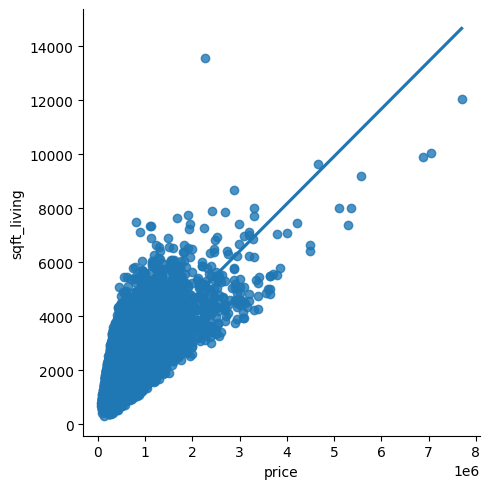

In [62]:
sns.lmplot(x='price',y='sqft_living', data=dataset, ci=None)

In [55]:
variables = dataset[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

<AxesSubplot:title={'center':'Person Correlation of Features'}>

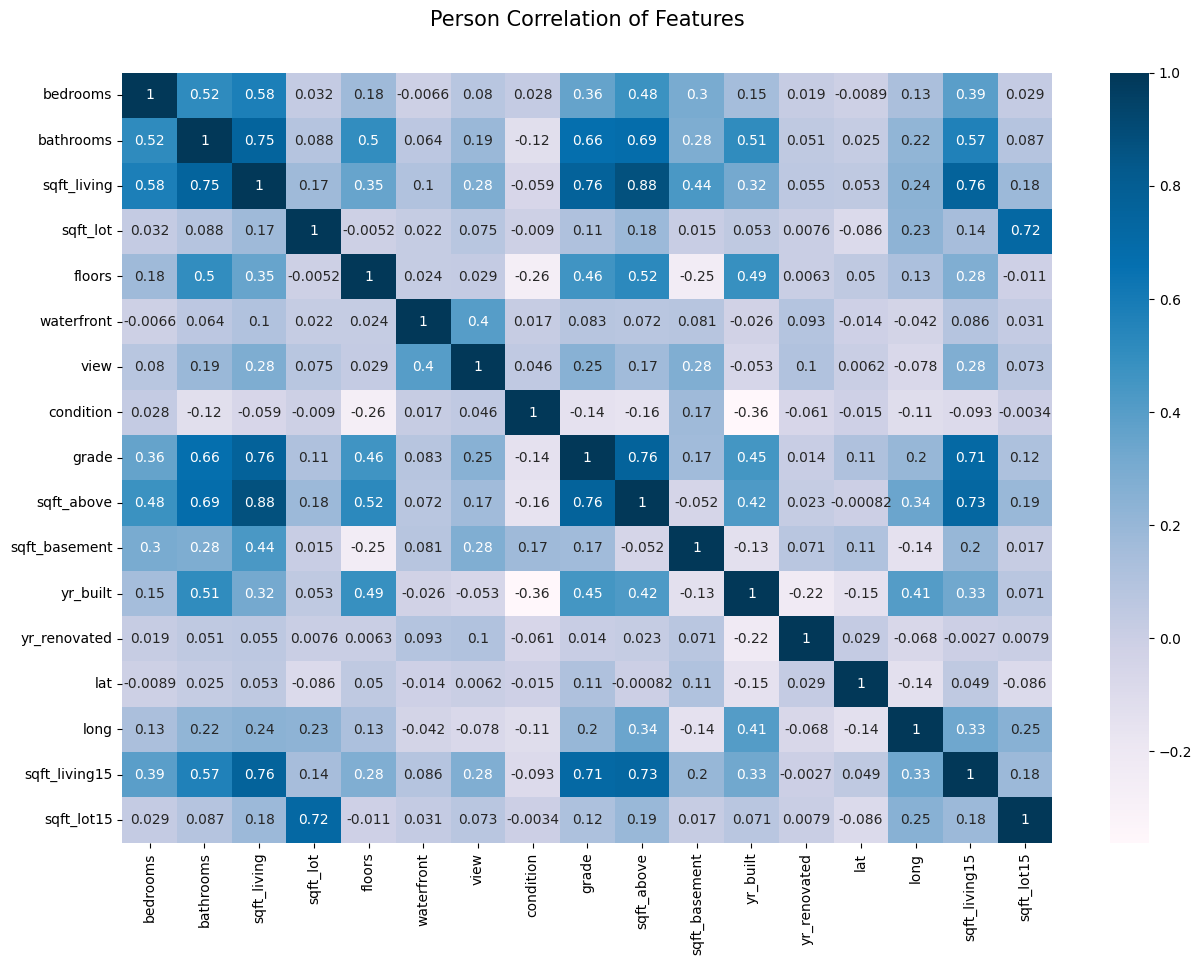

In [14]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(15, 10)) 
plt.title("Person Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(variables.astype(float).corr(), linecolor = "white", cmap = colormap, annot = True)

In [ ]:
# Une corrélation entre des variables indépendantes est appelée multicolinéarité, 
# et s'il y a multicolinéarité, des résultats de régression inexacts sont dérivés.
# X doit être fortement corrélé avec Y et les variables indépendantes doivent être 
# non corrélées pour obtenir des résultats relativement précis --
# Les estimations des coefficients sont médiocres ou instables, de sorte que même un petit changement dans 
# les données peut modifier considérablement l'estimation -- 
# Les coefficients sont statistiquement significatifs Peut sortir comme si ce n'est pas le cas

In [15]:
# Supprimer les variables de multicolinéarité
#vérifier les données
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [16]:
# Analyse de régression pour trouver la relation où la chambre affecte le prix, la variable dépendante
# (lorsqu'elle n'est pas affectée par d'autres variables)
dataset['intercept'] = 1
pm = sm.OLS(dataset['price'], dataset[['intercept','bedrooms']])
results_p = pm.fit()
results_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2271.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:18:58   Log-Likelihood:            -3.0652e+05
No. Observations:               21613   AIC:                         6.131e+05
Df Residuals:                   21611   BIC:                         6.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.298e+05   8931.866     14.533      0.000    1.12e+05    1.47e+05
bedrooms    1.217e+05   2554.304     47.651      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18859.406   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1199044.960
Skew:                           3.904   Prob(JB):                         0.00
Kurtosis:                      38.644   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Un coefficient de régression positif indiquant que plus il y a de chambres, plus le prix est cher 
# (lorsqu'il n'est pas affecté par d'autres variables)

In [18]:
#Lorsque toutes les variables sont utilisées comme entrées sans supprimer les variables hautement corrélées 
# (considération de multicolinéarité X)
dataset['intercept'] = 1
lm = sm.OLS(dataset['price'], dataset[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
       'lat', 'long', 'sqft_living15', 'sqft_lot15']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          1.233e+04
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                        0.00
Time:                        20:23:32   Log-Likelihood:                     -2.9502e+05
No. Observations:               21613   AIC:                                  5.901e+05
Df Residuals:                   21597   BIC:                                  5.902e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.566e+04   1925.386    -18.519      0.000   -3.94e+04   -3.19e+04
bathrooms      4.594e+04   3312.538     13.867      0.000    3.94e+04    5.24e+04
sqft_living     108.5651      2.312     46.962      0.000     104.034     113.096
sqft_lot          0.0347      0.049      0.713      0.476      -0.061       0.130
floors         1.554e+04   3592.141      4.326      0.000    8498.528    2.26e+04
waterfront     5.916e+05   1.77e+04     33.429      0.000    5.57e+05    6.26e+05
view            5.21e+04   2169.609     24.012      0.000    4.78e+04    5.64e+04
condition      2.502e+04   2367.707     10.568      0.000    2.04e+04    2.97e+04
grade          1.077e+05   2145.038     50.201      0.000    1.03e+05    1.12e+05
sqft_above       59.3380      2.242     26.467      0.000      54.944      63.732
sqft_basement    49.2271      2.650     18.573      0.000      44.032      54.422
yr_built      -3222.3483     65.356    -49.304      0.000   -3350.451   -3094.245
yr_renovated     13.6246      3.709      3.673      0.000       6.354      20.895
lat            4.861e+05   1.02e+04     47.850      0.000    4.66e+05    5.06e+05
long           1.433e+05   4166.709     34.401      0.000    1.35e+05    1.52e+05
sqft_living15    12.4729      3.437      3.629      0.000       5.735      19.210
sqft_lot15       -0.5384      0.074     -7.234      0.000      -0.684      -0.392
==============================================================================
Omnibus:                    18507.472   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1813665.119
Skew:                           3.620   Prob(JB):                         0.00
Kurtosis:                      47.289   Cond. No.                     1.51e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.41e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Lorsque toutes les variables sont utilisées comme entrées sans supprimer les variables hautement corrélées 
# (prise en compte de la multicolinéarité 
# À mesure que le nombre de variables augmente, le résultat de la régression peut être dérivé de manière erronée 
# en raison de l'apparition d'une multicolinéarité bedrooms coef = -3.549e+04 Plus il y a de chambres, plus le prix est bas.
# Une telle multicolinéarité déforme le résultat de la régression, 
# de sorte qu'une des variables à forte corrélation doit être supprimée.


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
pd.DataFrame({'column': column, 'VIF': variance_inflation_factor(lm.exog, i)} 
             for i, column in enumerate(lm.exog_names)
             if column != 'Intercept')

C:\opt\anaconda\envs\ds\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,column,VIF
0,bedrooms,2.327223e+01
1,bathrooms,2.853592e+01
2,sqft_living,inf
3,sqft_lot,2.365743e+00
4,floors,1.672442e+01
5,waterfront,1.212503e+00
6,view,1.551807e+00
7,condition,3.467540e+01
8,grade,1.417594e+02
9,sqft_above,inf


In [21]:
# Considérer la multicolinéarité
dataset['intercept'] = 1
lm_re = sm.OLS(dataset['price'], dataset[['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']])
results_re = lm_re.fit()
results_re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                          1.495e+04
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                        0.00
Time:                        20:33:20   Log-Likelihood:                     -2.9678e+05
No. Observations:               21613   AIC:                                  5.936e+05
Df Residuals:                   21602   BIC:                                  5.937e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       1.995e+04   1833.847     10.879      0.000    1.64e+04    2.35e+04
floors         6.542e+04   3602.554     18.161      0.000    5.84e+04    7.25e+04
waterfront     6.266e+05   1.92e+04     32.683      0.000    5.89e+05    6.64e+05
view           6.134e+04   2321.914     26.416      0.000    5.68e+04    6.59e+04
condition      2.788e+04   2561.926     10.881      0.000    2.29e+04    3.29e+04
grade          1.906e+05   1730.662    110.107      0.000    1.87e+05    1.94e+05
sqft_basement   107.8957      4.056     26.599      0.000      99.945     115.846
yr_built      -2741.4062     66.010    -41.530      0.000   -2870.791   -2612.022
yr_renovated     29.3489      3.982      7.370      0.000      21.544      37.154
lat            4.959e+05    1.1e+04     45.213      0.000    4.74e+05    5.17e+05
long           1.588e+05   4471.649     35.523      0.000     1.5e+05    1.68e+05
==============================================================================
Omnibus:                    21287.185   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3320421.877
Skew:                           4.432   Prob(JB):                         0.00
Kurtosis:                      63.071   Cond. No.                     2.54e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
X = dataset[['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
        'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']]
y = dataset['price']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
model=LinearRegression()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
y_predicted


array([643352.24775717, 442034.41271542, 730878.57221072, ...,
       788500.44514256, 949452.53449656, 909888.54693912])

In [78]:
y_compare={'y_test':y_test, 'y_predicted':y_predicted}
pd.DataFrame(y_compare)

,y_test,y_predicted
5506,532500.0,6.433522e+05
9279,410000.0,4.420344e+05
16034,782500.0,7.308786e+05
6608,995000.0,1.212293e+06
20359,279000.0,3.282974e+05
...,...,...
2953,438000.0,4.727290e+05
12092,299000.0,4.119322e+05
8566,510000.0,7.885004e+05
13787,1810000.0,9.494525e+05


In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE", mean_squared_error(y_test,y_predicted))

mae = mean_absolute_error(y_test, y_predicted)
print('MAE: ', mae)


MSE 51506037867.47393
MAE:  138296.8708591634


In [ ]:
# Multiple linear regression is a more specific calculation than simple linear regression.
# For straight-forward relationships, simple linear regression may easily capture the relationship between the two variables. 
# For more complex relationships requiring more consideration, multiple linear regression is often better.